# Exercise 10: Mapping, Twitter Style

This week I sought out using the option for live features and attempted to use my Twitter account toward attaining Developer approval.  Although I have not heard back from my portal application for support, most likely from being new to Twitter, I kept moving forward with the alternate TAGS and external data libraries methods, including my favorite Kaggle. 

As searching and filtering allowed for refinement to narrate with maps bring a defined way to flourish with the information, visual denotation is more in tune with the human aspects of delivery.  As "Scholars in the humanities and social sciences have long recognized the value of maps as a familiar and expressive medium for interpreting,  explaining, and communicating scholarly work" (Karsdorp, Kestemont, and Riddell 229). 

My application included:

- Import or collect tweets using a keyword or hashtag. Watch your rate limiting!
- Use Pandas to sort and analyze your tweets.
- Calculate user coordinates, where feasible, for the set of collected tweets. Again, watch your rate limiting!
- Map the tweets using the calculated locations.
- Use at least one data visualization from a previous exercise, demo, or the course text to analyze a different element of your tweets.

Bonus challenge: attempted to map some other quality of your data. I focused on the "country.csv" data file as a locational aspect for mapping the locations where a particular word or hashtag is used for this data file, which aided in visualizing the number of tweets in various places on the globe.



## Stage One: Import or collect tweets using a keyword or hashtag. Watch your rate limiting!
Initially, in commencing this assignment, a data file length (size) issue was revealed in stage #3. So, to continue understanding the process, the Twitter researched and collected data file "Countries.CSV" was used to begin the process. As a result, data preparation was found and organized using a prevalent .csv file (Karsdorp, Kestemont, and Riddell 130-31), allowing for a preliminary view of the information that may take focus and interest further from the organizational aspects of the code as dates and locations take on initial focus and scrape a set of tags. Which was simplified for this example to help eliminate the uncertainty of time and acceptance.  

In [8]:
import pandas as pd

df = pd.read_csv('trump_tweets.csv')
print(df.dtypes)

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object


## Stage Two:  Use Pandas to sort and analyze your tweets.


With the directive to help sort and eliminate the "county" and "country_code" data frame from "noise" analysis occurred.

In [9]:
tdf = df[['user_location','user_name','text']]
print(tdf)

       user_location        user_name  \
0     Washington, DC  Donald J. Trump   
1     Washington, DC  Donald J. Trump   
2     Washington, DC  Donald J. Trump   
3     Washington, DC  Donald J. Trump   
4     Washington, DC  Donald J. Trump   
...              ...              ...   
1979  Washington, DC  Donald J. Trump   
1980  Washington, DC  Donald J. Trump   
1981  Washington, DC  Donald J. Trump   
1982  Washington, DC  Donald J. Trump   
1983  Washington, DC  Donald J. Trump   

                                                   text  
0     We are United in our effort to defeat the Invi...  
1     Congratulations Allen, great job! https://t.co...  
2     So we catch Obama &amp; Biden, not to even men...  
3     The Radical Left Democrats, who totally contro...  
4     I am in @AirForceOne_HQ flying to the Great St...  
...                                                 ...  
1979  I love the Great State of Georgia, but the peo...  
1980  When are we going to be allowed to do

Furthermore, below there was a conscious attempt to check concentrations of "country" value counts, using less density toward mapping. Still, I kept that process moving as the mapping at the end would soon be revealed to allow for the vastness to take form even with a smaller data set. The repeated data set shown on the top two tears was best to work with.

In [10]:
locs = tdf['user_location'].value_counts()
print(locs)

Washington, DC    1984
Name: user_location, dtype: int64


## Stage Three: Calculate user coordinates, where feasible, for the set of collected tweets. Again, watch your rate limiting! 

Geocoding "has a natural expression as a Python dictionary" toward mapping where the "block  of code loads this dictionary from its serialized form and adds the latitude and  longitude" toward tweet location of interest (Karsdorp, Kestemont, and Riddell 232). And with the conscious effort to run a slightly different expansion in this data frame, beyond the initial challenges of using significant data set choices. I adjusted toward a suitable limiter (1) to help smooth the process of distorted occurrences and time variables with this chosen smaller file that was explored. And it worked very well with little hindrance and time outs.  This enabled a revealing of "country" codes even though it was a smaller data set bringing on a 240-row search, which kept the data set safe and tested toward the coding optimization of components.

In [11]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def find_location(row):
    place = row['user_location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

C:\Users\dlawb\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,user_location,user_name,text,latitude,longitude
0,"Washington, DC",Donald J. Trump,We are United in our effort to defeat the Invi...,38.895037,-77.036543
1,"Washington, DC",Donald J. Trump,"Congratulations Allen, great job! https://t.co...",38.895037,-77.036543
2,"Washington, DC",Donald J. Trump,"So we catch Obama &amp; Biden, not to even men...",38.895037,-77.036543
3,"Washington, DC",Donald J. Trump,"The Radical Left Democrats, who totally contro...",38.895037,-77.036543
4,"Washington, DC",Donald J. Trump,I am in @AirForceOne_HQ flying to the Great St...,38.895037,-77.036543
...,...,...,...,...,...
1979,"Washington, DC",Donald J. Trump,"I love the Great State of Georgia, but the peo...",38.895037,-77.036543
1980,"Washington, DC",Donald J. Trump,When are we going to be allowed to do signatur...,38.895037,-77.036543
1981,"Washington, DC",Donald J. Trump,It is up to the States to distribute the vacci...,38.895037,-77.036543
1982,"Washington, DC",Donald J. Trump,"Loeffler, Perdue Support Increasing Relief Pay...",38.895037,-77.036543


Note: Set of latitude and longitude in relation to "country" and "country_code" even with limited found data (NaN) represented.

## Stage Four:  Map the tweets using the calculated locations.
When dealing in the visual notation of locational tweets, and "the three-dimensional surface of interest has been flattened into two dimensions" (Karsdorp, Kestemont, and Riddell 233), the locational shape forms on the surface of the map. Thus, the mode to import play with box style and then clean up the data frame below was accomplished.

In [12]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

Now the mode toward cleaning up data frame takes priority. This enables us to "Employ coordinate data or use the map as a picture" and fully realize the focus areas with less distraction (Drucker 133).  Now, I cleaned up the data frame to make sure I moved stuff is not found. To remove odd patterns if shown. Grab the indexes in everything and data frame that is not equal not to found.  And just take data frames and those rows and the same category.

In [13]:
tdf = tdf[tdf['latitude'] != 'Not Found']
tdf = tdf[tdf['longitude'] != 'Not Found']

lats = tdf['latitude']
longs = tdf['longitude']

print(lats)
print(longs)

0       38.895037
1       38.895037
2       38.895037
3       38.895037
4       38.895037
          ...    
1979    38.895037
1980    38.895037
1981    38.895037
1982    38.895037
1983    38.895037
Name: latitude, Length: 1984, dtype: float64
0      -77.036543
1      -77.036543
2      -77.036543
3      -77.036543
4      -77.036543
          ...    
1979   -77.036543
1980   -77.036543
1981   -77.036543
1982   -77.036543
1983   -77.036543
Name: longitude, Length: 1984, dtype: float64


Note: Printing shows differences in an index with index numbers that worked well here, which is iterable—allowing us to go through the readable correspondences (aka data sanitizing).

And after data disinfecting with the NaH's, the visual elements can move on with more staging advantages, bringing in the concept of the "contrast is made between concepts of "space" as a physical environment and "place" as an experiential one" (Drucker 144).  This index is to reindex to hep that doesn't jump over any numbers.  In this case, this was just used to represent a practice if needed, as it was not required with this small data set.

In [14]:
lats.index=range(0,len(lats))
longs.index=range(0,len(longs))

print(lats)

0       38.895037
1       38.895037
2       38.895037
3       38.895037
4       38.895037
          ...    
1979    38.895037
1980    38.895037
1981    38.895037
1982    38.895037
1983    38.895037
Name: latitude, Length: 1984, dtype: float64


Note: No, not founds (NaN) left nice!

## Stage Five: Use at least one data visualization from a previous exercise, demo, or the course text to analyze a different element of your tweets.

Today, most "geographical maps using the package Cartopy, ...is Python's (emerging) standard for geospatial data processing and analysis" (Karsdorp, Kestemont, and Riddell 230). And with the use of a "Python library Cartopy... " demonstrated how ...maps can help communicate a historical narrative (Karsdorp, Kestemont, and Riddell 244). Now we are able to plot a solution and move toward the bonus challenge of charting user interaction.


Note: there is an option to pull data used toward Geographic concentrations related to locations -but not necessarily where the tweets are coming from.

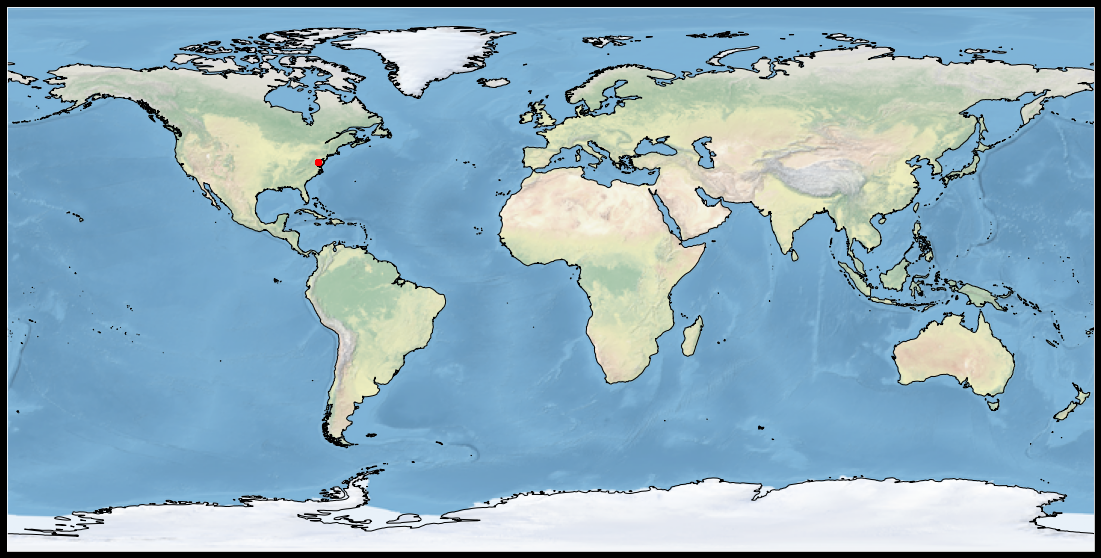

In [15]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                    
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

Here I am checking for exact matching. Where users have given the location of the same interaction, reset location to help map: original point and these concentrations, Data set. Which, in the end, allows for  "Storytelling and narrative mapping...The individual connection to landscape and its effect on imagination" (Drucker 146). Groupby enabled this exploration to get a sense of the locational accuracy of the data frame visualized from above. I checked for exact matches. Reset the index to set to the amount toward alternative ways to map points and concentrations.

In [16]:

counter = tdf.groupby(['latitude','longitude']).size().reset_index().rename(columns={0:'count'})

print(counter)

    latitude  longitude  count
0  38.895037 -77.036543   1984


## Bonus Challenge: 
Here an attempt to map other aspects of auspol2019.csv data was pursued. 1) attempted only to map the locations where a specific word or hashtag was used. 2) an attempt to visualize the number of tweets sharing a location using a larger radius dot. In the end, it helps us define the circle we draw based on data plotting horizontal and verticle choice. This brings on the realization of the human dimension, in the visualization of data, "Mapping tools are an integral part of political and social work with statistical information. They address demographics, resource management" with the social aspects of communication (Drucker 130).

Note: There are no restrictions on locations toward plotting the locational information on our chart. Still, we find a radius function to create circles of different sizes to find the cluster of concentrations. More variety in visualization can be a more complicated function to create a broader range of locational outputs.

this line darsw the circles "for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))"

It helps transform the coordinates to find the circles based on each row as the map creates the action that is visual value.


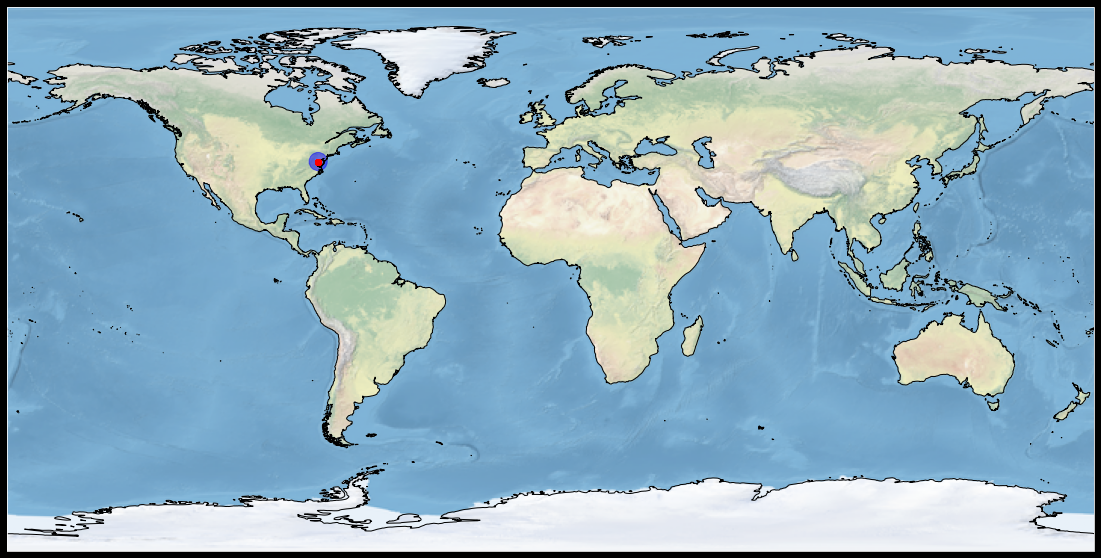

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# plot individual locations                                                                                                       
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                           
# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
def get_radius(freq):
    if freq < 5:
        return 1
    elif freq < 10:
        return 2
    elif freq >= 10:
        return 3
# plot count of tweets per location

colLats = counter['latitude']
colLongs = counter['longitude']
colCounts = counter['count']

for i in range(0, len(counter)):
    ax.add_patch(Circle(xy=[colLongs[i], colLats[i]], radius=get_radius(colCounts[i]), color='blue',alpha=0.5, transform=ccrs.PlateCarree()))

plt.show()